In [1]:
## Install required package
#!pip install refinitiv-data

In [2]:
# Import Library
import refinitiv.data as rd

# Open session (default is desktop session)
# https://github.com/LSEG-API-Samples/Example.DataLibrary.Python/blob/main/Examples/4-Session/EX-4.01.01-Sessions.ipynb
rd.open_session()

<refinitiv.data.session.Definition object at 0x24ce588e820 {name='workspace'}>

In [3]:
# check version of the library
print(rd.__version__)

1.6.0


## 1) Search
- The search() function identifies a matching set of documents which satisfy the caller's criteria, sorts it, and selects a subset of the matches to return as the result. The search can be performed easily with the help of Advanced Search tool provided in Workspace / Eikon application
  - [Find content and functionality using Refinitiv Data Library with Advanced Search](https://developers.lseg.com/en/article-catalog/article/Find-content-and-functionality-using-Refinitiv-Data-Library-with-Eikon-Advanced-Search)
- To understand more about the search function, a powerful, search engine covering content such as quotes, instruments, organizations, and many other assets that can be programmatically integrated within your business Workflow, it’s introduced in this article
  - [Building Search into your Application Workflow](https://developers.lseg.com/en/article-catalog/article/building-search-into-your-application-workflow)

In [4]:
# Search for Equities with Exchange Name is NYSE Consolidated, descending ordered by Market Cap Company in USD
search_df = rd.discovery.search(
    view = rd.discovery.Views.EQUITY_QUOTES,
    top = 10, # select only top 10 rows of the result
    filter = "(SearchAllCategoryv2 eq 'Equities' and ExchangeName xeq 'NYSE Consolidated')",
    select = "DTSubjectName,ExchangeName,RIC,IssueISIN,MktCapCompanyUsd",
    order_by = "MktCapCompanyUsd desc"
)

search_df

,DTSubjectName,ExchangeName,RIC,IssueISIN,MktCapCompanyUsd
0,Berkshire Hathaway Inc,NYSE Consolidated,BRKa,US0846701086,890309930782
1,Berkshire Hathaway Inc,NYSE Consolidated,BRKb,US0846707026,890309930782
2,Berkshire Hathaway Ord Shs Class B,NYSE Consolidated,BRKb_w^A97,US0846707026,890309930782
3,Berkshire Hathaway Ord Shs Class A,NYSE Consolidated,BRKa_w^L96,US0846701086,890309930782
4,Eli Lilly and Co,NYSE Consolidated,LLY,US5324571083,736748650890
5,Eli Lilly Ord Shs,NYSE Consolidated,LLYw^C19,US5324571083,736748650890
6,Eli Lilly Ord Shs,NYSE Consolidated,LLY_w^J97,US5324571083,736748650890
7,Eli Lilly Ord Shs,NYSE Consolidated,LLYw^I95,US5324571083,736748650890
8,Eli Lilly Ord Shs,NYSE Consolidated,LLY_w^L95,US5324571083,736748650890
9,Taiwan Semiconductor Manufacturing Co Ltd,NYSE Consolidated,TSM,US8740391003,637319825127


## 2) Symbology
#### Convert symbols

In [5]:
# Example 1 - convert_symbols()
from refinitiv.data.discovery import (
    convert_symbols,
    SymbolTypes
)

# Convert to all available symbol types
response = convert_symbols(
    symbols=['IBM','LSEG.L','MSFT.O','AAPL.O']
)
response

,DocumentTitle,RIC,IssueISIN,CUSIP,TickerSymbol,IssuerOAPermID,SEDOL
IBM,"International Business Machines Corp, Ordinary...",IBM,US4592001014,459200101,IBM,4295904307,<NA>
LSEG.L,"London Stock Exchange Group PLC, Ordinary Shar...",LSEG.L,GB00B0SWJX34,<NA>,LSEG,4298007752,B0SWJX3
MSFT.O,"Microsoft Corp, Ordinary Share, NASDAQ Global ...",MSFT.O,US5949181045,594918104,MSFT,4295907168,<NA>
AAPL.O,"Apple Inc, Ordinary Share, NASDAQ Global Selec...",AAPL.O,US0378331005,037833100,AAPL,4295905573,<NA>


In [6]:
# Available SymbolTypes - run help(SymbolTypes)  
    # CUSIP = <SymbolTypes.CUSIP: 'CUSIP'>
    # ISIN = <SymbolTypes.ISIN: 'IssueISIN'>
    # LIPPER_ID = <SymbolTypes.LIPPER_ID: 'FundClassLipperID'>
    # OA_PERM_ID = <SymbolTypes.OA_PERM_ID: 'IssuerOAPermID'>
    # RIC = <SymbolTypes.RIC: 'RIC'>
    # SEDOL = <SymbolTypes.SEDOL: 'SEDOL'>
    # TICKER_SYMBOL = <SymbolTypes.TICKER_SYMBOL: 'TickerSymbol'>

# Convert from ticker to RIC, OA Perm ID
response = convert_symbols(
    symbols=['IBM','LSEG','MSFT','AAPL'], 
    from_symbol_type=SymbolTypes.TICKER_SYMBOL,
    to_symbol_types=[SymbolTypes.RIC, SymbolTypes.OA_PERM_ID],
    preferred_country_code="USA"
)
response

,DocumentTitle,RIC,IssuerOAPermID
IBM,"International Business Machines Corp, Ordinary...",IBM,4295904307
LSEG,"London Stock Exchange Group PLC, Ordinary Shar...",LSEG.L,4298007752
MSFT,"Microsoft Corp, Ordinary Share, NASDAQ Global ...",MSFT.O,4295907168
AAPL,"Apple Inc, Ordinary Share, NASDAQ Global Selec...",AAPL.O,4295905573


#### Get data

In [7]:
# Example 2 - Get RIC from bond
preferred_ric = rd.get_data('US9128283J70',fields=['TR.PreferredRIC'])
preferred_ric

,Instrument,Preferred RIC
0,US9128283J70,9128283J7=


In [8]:
# Example 3 - Get CUSIP and international CUSIP
rics = ['IBM.N', 'VOD.L', 'GOOG.O', '0005.HK']
fields = ['TR.CUSIP', 'TR.CUSIPExtended', 'TR.PriceClose']

cusip_df = rd.get_data(rics, fields)
cusip_df

,Instrument,CUSIP,CUSIP (extended),Price Close
0,IBM.N,459200101,459200101,190.8
1,VOD.L,,G93882192,69.42
2,GOOG.O,02079K107,02079K107,151.94
3,0005.HK,,G4634U169,61.1


#### Get data with Screener
- Article: [Find Your Right Companies with SCREENER | Eikon Data APIs(Python)](https://developers.lseg.com/en/article-catalog/article/find-your-right-companies-with-screener-eikon-data-apis-python)
- Remark: [TRBC Sector Classification](https://www.lseg.com/en/data-analytics/financial-data/indices/trbc-business-classification)

In [9]:
# Example 4 - Screener
from refinitiv.data.discovery import Screener

screener_request = Screener('U(IN(Equity(active,public,primary))), IN(TR.TRBCEconSectorCode,"51"), TR.CompanyMarketCap>=10000000000,CURN=USD')
#print(list(screener_request))
screener_df = rd.get_data(screener_request, fields=['TR.RIC','TR.CompanyName'])
screener_df

,Instrument,RIC,Company Name
0,HEIG.DE,HEIG.DE,Heidelberg Materials AG
1,UPM.HE,UPM.HE,UPM-Kymmene Oyj
2,CRH.N,CRH.N,CRH PLC
3,RIO.L,RIO.L,Rio Tinto PLC
4,SIKA.S,SIKA.S,Sika AG
...,...,...,...
124,5411.T,5411.T,JFE Holdings Inc
125,ALB.N,ALB.N,Albemarle Corp
126,IMCD.AS,IMCD.AS,IMCD NV
127,WPM.TO,WPM.TO,Wheaton Precious Metals Corp


In [10]:
# Example 5 - Peers
from refinitiv.data.discovery import Peers

microsoft_peers = Peers('MSFT.O')
print(list(microsoft_peers))

['CRM.N', 'ORCL.N', 'ADBE.OQ', 'AMZN.OQ', 'META.OQ', 'IBM.N', 'OKTA.OQ', 'AAPL.OQ', 'CSCO.OQ', '0700.HK', 'SAPG.DE', 'HPE.N', '6758.T', '7974.T', 'ZTNO.PK', 'SNOW.N', 'NOW.N', 'WDAY.OQ', 'INTU.OQ', 'DDOG.OQ', 'TEAM.OQ', 'DOCU.OQ', 'MDB.OQ', 'HUBS.N', 'CFLT.OQ', 'PANW.OQ', 'PLTR.N', 'PATH.N', 'GOOGL.OQ', 'ZM.OQ', 'ZI.OQ', 'NVDA.OQ', 'TWLO.N', 'CRWD.OQ', 'ZS.OQ', 'DT.N', 'NET.N', 'SHOP.N', 'ADSK.OQ', 'HCP.O', 'FTNT.OQ', 'VEEV.N', 'INFA.N', 'ESTC.N', 'SMAR.N', 'IOT.N', 'MNDY.OQ', 'ASAN.N', 'GTLB.OQ', 'AMD.OQ']


In [11]:
# Use the microsoft peers with get_history()
peers_df = rd.get_history(microsoft_peers, ['BID', 'ASK'], start = '2024-02-01', end = '2024-02-08')
peers_df

CRM.N          ORCL.N         ADBE.OQ         AMZN.OQ          \
               BID     ASK     BID     ASK     BID     ASK     BID     ASK   
Date                                                                         
2024-02-01  283.79   283.9  115.53  115.54  628.04  628.09  159.74  159.76   
2024-02-02  285.63  285.68  115.78  115.79  634.41  634.81   171.8  171.82   
2024-02-05  288.06   288.1  116.39   116.4  630.15  630.48  170.27  170.31   
2024-02-06  285.83  285.84   115.3  115.32  607.13  607.28  169.14  169.15   
2024-02-07  288.83  288.88  117.28  117.29  615.85  616.21  170.52  170.53   
2024-02-08  291.94  291.99  116.65  116.66  615.85  616.06  169.83  169.85   

           META.OQ          ...  IOT.N        MNDY.OQ         ASAN.N         \
               BID     ASK  ...    BID    ASK     BID     ASK    BID    ASK   
Date                        ...                                               
2024-02-01    <NA>    <NA>  ...  31.62  31.64  211.12   211.2  17.53  17.55   
2024-02-02  474.86  474.99  ...   32.5  32.51  214.06  214.41   17.6  17.61   
2024-02-05  459.24  459.48  ...  31.76  31.78  211.87  212.07  17.31  17.32   
2024-02-06  454.63  454.73  ...  31.71  31.73  215.27  215.55  17.99   18.0   
2024-02-07  469.48   469.6  ...  32.41  32.42  217.98  218.09  18.01  18.02   
2024-02-08  470.13  470.17  ...  34.28  34.29  227.07  227.31  18.95  18.96   

           GTLB.OQ         AMD.OQ          
               BID    ASK     BID     ASK  
Date                                       
2024-02-01   72.31  72.32  170.46  170.47  
2024-02-02   72.31  72.32  177.63  177.68  
2024-02-05   71.93  71.96  174.17  174.21  
2024-02-06   70.94  70.95  167.86  167.88  
2024-02-07   72.75  72.77  170.89  170.92  
2024-02-08   76.19  76.21  169.27  169.29  

[6 rows x 100 columns]

**Get Data**
[EX-1.01.01-GetData.ipynb](https://github.com/LSEG-API-Samples/Example.DataLibrary.Python/blob/main/Examples/1-Access/EX-1.01.01-GetData.ipynb)

In [12]:
# Example 6 - get data of instruments with all available fields
df = rd.get_data(['LSEG.L', 'VOD.L'])
df

,Instrument,PROD_PERM,RDNDISPLAY,DSPLY_NAME,RDN_EXCHID,TRDPRC_1,TRDPRC_2,TRDPRC_3,TRDPRC_4,TRDPRC_5,...,PCTCHG_1W,PCT1M,PCTCHG_3M,PCTCHG_6M,PCTCHG_9M,PCT1Y,PCTCHG_WTD,PCTCHG_MTD,PCTCHG_QTD,PCTCHG_YTD
0,LSEG.L,5625,115,LON.STK.EXCH,LSE,9564.0,9564.0,9566.0,9562.0,9560.0,...,0.0418,7.0517,2.9051,16.068,14.9519,21.6175,-0.9116,7.7512,3.127,3.127
1,VOD.L,5625,115,VODAFONE GRP,LSE,70.1776,70.178,70.2,70.18,70.16,...,3.9668,2.5988,2.734,-9.7393,-5.599,-21.8772,2.5539,1.5301,2.3594,2.3594


In [13]:
# Example 7 - get data of instruments with specific fields (add field name in field parameter)
df = rd.get_data(['LSEG.L', 'VOD.L'], ['TR.CommonName', 'TR.Revenue'])
df

,Instrument,Company Common Name,Revenue
0,LSEG.L,London Stock Exchange Group PLC,8379000000
1,VOD.L,Vodafone Group PLC,45706000000


**Chains**
[EX-1.01.07-Chains.ipynb](https://github.com/LSEG-API-Samples/Example.DataLibrary.Python/blob/main/Examples/1-Access/EX-1.01.07-Chains.ipynb)

In [14]:
# Example 8 - get constituent with Chain object
from refinitiv.data.discovery import Chain
fchi = Chain("0#.FCHI")
print(fchi.constituents)

['ACCP.PA', 'AIRP.PA', 'AIR.PA', 'MT.AS', 'AXAF.PA', 'BNPP.PA', 'BOUY.PA', 'CAPP.PA', 'CARR.PA', 'CAGR.PA', 'DANO.PA', 'DAST.PA', 'EDEN.PA', 'ENGIE.PA', 'ESLX.PA', 'EUFI.PA', 'HRMS.PA', 'PRTP.PA', 'OREP.PA', 'LVMH.PA', 'LEGD.PA', 'MICP.PA', 'ORAN.PA', 'PERP.PA', 'PUBP.PA', 'RENA.PA', 'SAF.PA', 'SGOB.PA', 'SASY.PA', 'SCHN.PA', 'SOGN.PA', 'STLAM.PA', 'STMPA.PA', 'TEPRF.PA', 'TCFP.PA', 'TTEF.PA', 'URW.PA', 'VIE.PA', 'SGEF.PA', 'VIV.PA']


In [15]:
print(fchi.summary_links)

['.DJI', 'EUR=', '/.STOXX50E', '.FCHI', '.AD.FCHI']


In [16]:
# Example 8.1 - use the chain with get_data()
rd.get_data(fchi, ['BID', 'ASK', 'TR.Revenue'])

,Instrument,Revenue,BID,ASK
0,ACCP.PA,5056000000,43.65,43.67
1,AIRP.PA,27607600000,193.62,193.66
2,AIR.PA,65446000000,172.12,172.18
3,MT.AS,68275000000,25.43,25.44
4,AXAF.PA,<NA>,34.82,34.835
...,...,...,...,...
35,TTEF.PA,218945000000,63.35,63.36
36,URW.PA,3061000000,74.6,74.66
37,VIE.PA,45351000000,30.28,30.29
38,SGEF.PA,69619000000,119.54,119.56


In [17]:
# Example 8.2 - use the chain with get_history()
rd.get_history(fchi, ['BID', 'ASK'])

ACCP.PA        AIRP.PA          AIR.PA           MT.AS          \
               BID    ASK     BID     ASK     BID     ASK     BID     ASK   
Date                                                                        
2024-02-29   40.08  40.09   187.9  187.92  152.94   153.0  24.115  24.155   
2024-03-01   39.73  39.75   186.9  186.94  152.64  152.66  24.075   24.08   
2024-03-04   39.35  39.45  189.58  190.08   155.3  155.36  23.745   23.75   
2024-03-05   39.37  39.38  189.38  189.54  157.52  157.58  23.345  23.415   
2024-03-06   39.47  39.49  190.54  190.78  158.04  158.26  23.435   23.44   
...            ...    ...     ...     ...     ...     ...     ...     ...   
2024-03-21    42.3  42.32   193.7   193.8  169.28   169.3   24.88  24.905   
2024-03-22   42.67  42.68  190.48   190.5   169.9  169.92   24.99    25.0   
2024-03-25   43.33  43.34  191.22  191.32  170.12  170.14  25.175    25.2   
2024-03-26   43.42   43.5  192.46   192.6  170.62  170.64  25.135  25.145   
2024-03-27   43.19   43.3   193.1  193.32  171.52   171.6  25.495    25.5   

           AXAF.PA          ... TTEF.PA        URW.PA        VIE.PA         \
               BID     ASK  ...     BID    ASK    BID    ASK    BID    ASK   
Date                        ...                                              
2024-02-29  32.875   32.88  ...   58.99  59.01  67.58  67.68  28.65  28.68   
2024-03-01   32.36   32.38  ...    59.8  59.82  69.02  69.08  29.01  29.02   
2024-03-04   32.62  32.625  ...   59.38  59.39   69.9   70.1  28.97  29.02   
2024-03-05  32.715  32.725  ...   59.16  59.17  69.06  69.08  28.82  28.88   
2024-03-06   32.72   32.73  ...   59.98  59.99  68.62  68.64   29.0  29.01   
...            ...     ...  ...     ...    ...    ...    ...    ...    ...   
2024-03-21   34.65  34.695  ...   62.92   63.0  73.36  73.38  29.24  29.25   
2024-03-22   34.48  34.485  ...   62.85  62.87   73.6  73.62  29.58  29.64   
2024-03-25  34.575  34.585  ...   63.22  63.24  73.82   73.9  29.65  29.66   
2024-03-26   34.59    34.6  ...   62.97  62.98  74.52  74.56  29.79   29.8   
2024-03-27   34.69    34.7  ...   63.03  63.04  74.74  74.76  30.36  30.37   

           SGEF.PA          VIV.PA          
               BID     ASK     BID     ASK  
Date                                        
2024-02-29  118.38  118.42   10.33  10.335  
2024-03-01  117.28   117.3   10.45  10.465  
2024-03-04  117.12  117.14  10.355  10.365  
2024-03-05  117.64   117.7   10.36  10.365  
2024-03-06  117.18  117.38  10.195    10.2  
...            ...     ...     ...     ...  
2024-03-21  116.74  116.88   9.906   9.916  
2024-03-22  116.28  116.42  10.005  10.015  
2024-03-25  115.94  115.96   9.964   9.982  
2024-03-26  118.26  118.46   9.954   9.972  
2024-03-27  120.06  120.08   10.04   10.05  

[20 rows x 80 columns]

## 3) Timeseries
#### 3.1) Get data with field level parameter
Available parameters of each field can be found in _Parameters_ tab in __CodeCreator__ app of Workspace.

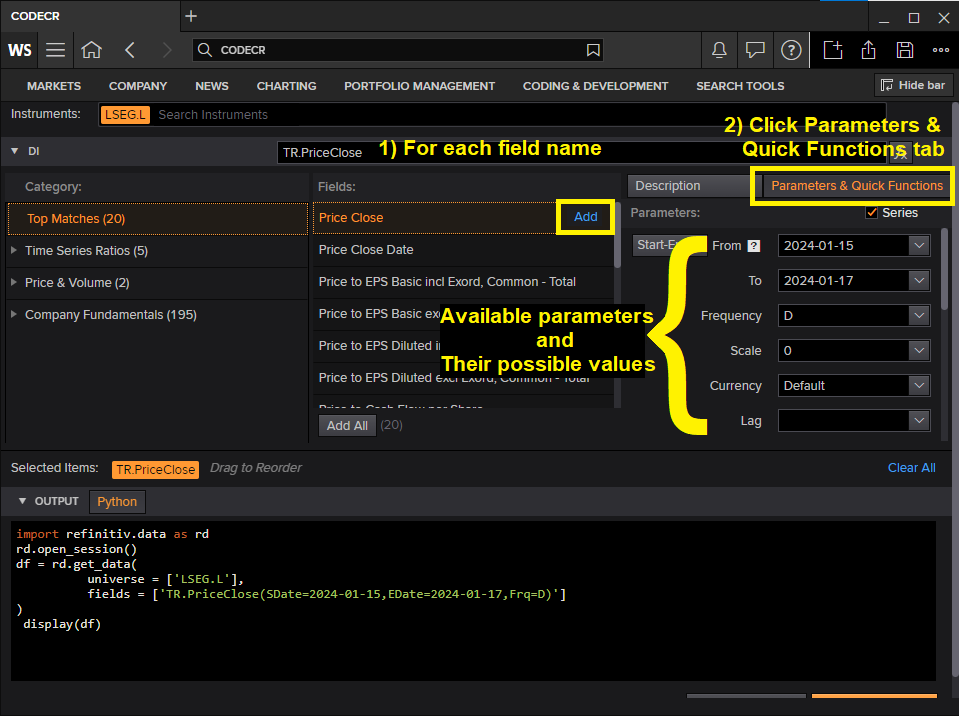

In [18]:
# Example 1 - field level parameters are applied into each field
rics = ['AAPL.O','IBM','MSFT.O','LSEG.L']

# Parameters used are
    # SDate=2024-01-15 # start date
    # EDate=2024-01-17 # end date
    # Frq=D # frequency = daily

df = rd.get_data(rics,
                   ['TR.PriceClose(SDate=2024-01-15,EDate=2024-01-17,Frq=D).date',
                    'TR.PriceClose(SDate=2024-01-15,EDate=2024-01-17,Frq=D)',
                    'TR.TotalReturn1Mo(SDate=2024-01-15,EDate=2024-01-17,Frq=D)'])
df

,Instrument,Date,Price Close,1 Month Total Return
0,AAPL.O,2024-01-16,183.63,-7.055727
1,AAPL.O,2024-01-17,182.68,-7.536569
2,IBM,2024-01-16,166.96,2.915614
3,IBM,2024-01-17,166.08,2.373174
4,MSFT.O,2024-01-16,390.27,5.270682
5,MSFT.O,2024-01-17,389.47,5.054892
6,LSEG.L,2024-01-15,9210.0,0.108696
7,LSEG.L,2024-01-16,9224.0,0.26087
8,LSEG.L,2024-01-17,9152.0,-0.521739


#### 3.2) Get data with request level parameter (global parameter)

In [19]:
#Example 2 - request level parameters are applied to all fields in the request
rics = ['AAPL.O','IBM','MSFT.O','LSEG.L']

# Parameters used are
    # SDate=2024-01-15 # start date
    # EDate=2024-01-17 # end date
    # Frq=D # frequency = daily

df = rd.get_data(rics,
                 ['TR.PriceClose.date','TR.PriceClose','TR.TotalReturn1Mo'],
                 {'SDate':'2024-01-15','EDate':'2024-01-17','Frq':'D'}
                )
df

,Instrument,Date,Price Close,1 Month Total Return
0,AAPL.O,2024-01-16,183.63,-7.055727
1,AAPL.O,2024-01-17,182.68,-7.536569
2,IBM,2024-01-16,166.96,2.915614
3,IBM,2024-01-17,166.08,2.373174
4,MSFT.O,2024-01-16,390.27,5.270682
5,MSFT.O,2024-01-17,389.47,5.054892
6,LSEG.L,2024-01-15,9210.0,0.108696
7,LSEG.L,2024-01-16,9224.0,0.26087
8,LSEG.L,2024-01-17,9152.0,-0.521739


#### 3.3) Get history

In [20]:
#Example 3 - retrieve timeseries data with get_history() function

rics = ['MSFT.O','LSEG.L']

# no field specified -> all available field will be returned
df = rd.get_history(rics,
                    start = '2024-01-15',
                    end = '2024-01-17'
                   )
df

MSFT.O                                                       \
           TRDPRC_1  HIGH_1     LOW_1 ACVOL_UNS OPEN_PRC     BID     ASK   
Date                                                                       
2024-01-16   390.27  394.03  387.6229  27202268   393.66  390.25  390.28   
2024-01-17   389.47  390.11    384.81  22234108   387.98  389.39  389.53   

                                            ...     LSEG.L                  \
             TRNOVR_UNS      VWAP BLKCOUNT  ... OPN_AUCVOL OPN_AUC CLS_AUC   
Date                                        ...                              
2024-01-16  10627925572  390.7125       41  ...       2626    9188    9224   
2024-01-17   8635107394  388.1688       36  ...       3572    9166    9152   

                                                                           \
           TRD_STATUS INT_AUC INT_AUCVOL EX_VOL_UNS ALL_C_MOVE ELG_NUMMOV   
Date                                                                        
2024-01-16          1    <NA>       <NA>    1008797       2904       2546   
2024-01-17          1    <NA>       <NA>    1888141       5124       4722   

                    
           NAVALUE  
Date                
2024-01-16    <NA>  
2024-01-17    <NA>  

[2 rows x 47 columns]

In [21]:
# pick only interested fields, add them into the 'fields' parameter

# Supported intervals are:
    # tick, tas, taq, minute, 1min, 5min, 10min, 30min, 60min, hourly, 1h, daily,
    # 1d, 1D, 7D, 7d, weekly, 1W, monthly, 1M, quarterly, 3M, 6M, yearly, 1Y
        
df = rd.get_history(universe = rics,
                    fields = ['BID', 'ASK'],
                    start = '2024-01-15',
                    end = '2024-01-17',
                    interval = 'daily'
                   )
df

MSFT.O         LSEG.L      
               BID     ASK    BID   ASK
Date                                   
2024-01-16  390.25  390.28   9222  9224
2024-01-17  389.39  389.53   9150  9152

## 4) Company Guidance

In [22]:
fields = ['TR.GuidanceMeasure',
          'TR.GuidancePeriodYear',
          'TR.GuidancePeriodMonth',
          'TR.GuidanceDate',
          'TR.GuidanceText',
          'TR.GuidanceSpeaker',
          'TR.GuidanceDocType']

guidance = rd.get_data('TSLA.O', fields, {'Period': 'FY1'})
guidance

,Instrument,Guidance Measure,Period Year,Period Month,Activation Date,Guidance Text,Guidance Speaker,The Doc Type
0,TSLA.O,Tot. Prod. Per Day (BOE),2024,12,2023-04-19 17:30:00,"And going forward for the rest of the year, th...","Andrew D. Baglino, Tesla, Inc. - SVP of Powert...",Transcript
1,TSLA.O,Revenue,2024,12,2024-01-24 17:30:00,"For 2024, our focus is to continue growing our...","Martin Viecha, Tesla, Inc. - Senior Director f...",Transcript
2,TSLA.O,Capital Expenditures,2024,12,2024-01-24 17:30:00,"Accordingly, we are currently expecting our ca...","Vaibhav Taneja, Tesla, Inc. - CFO, Corporate C...",Transcript
3,TSLA.O,Cost Of Goods Sold,2024,12,2023-04-19 17:30:00,"Altogether, the team accomplished a 25% reduct...","Andrew D. Baglino, Tesla, Inc. - SVP of Powert...",Transcript


## 5) Earnings

In [23]:
rics = ['TSLA.O','AAPL.O','IBM','AMZN.O','JPM','GS']
fields = ['TR.EpsSmartEst','TR.EPSMean','TR.EpsPreSurprisePct','TR.EpsPreSurprise',
          'TR.EpsPreSurpriseFlag','TR.EPSMedian','TR.EPSLow','TR.EPSHigh']

earnings_df = rd.get_data(rics, fields)
earnings_df

,Instrument,Earnings Per Share - SmartEstimate®,Earnings Per Share - Mean,Earnings Per Share - Predicted Surprise PCT,Earnings Per Share - Predicted Surprise,Earnings Per Share - Predicted Surprise Flag,Earnings Per Share - Median,Earnings Per Share - Low,Earnings Per Share - High
0,TSLA.O,2.65761,2.91969,-8.976,-0.26208,-1,2.96,1.299,4.23
1,AAPL.O,6.58013,6.56025,0.303,0.01988,0,6.5665,6.3,6.9
2,IBM,10.11898,10.1005,0.183,0.01848,0,10.085,9.84,10.51
3,AMZN.O,4.25038,4.12882,2.944,0.12156,1,4.11,3.26,5.09
4,JPM,16.00039,15.93192,0.43,0.06847,0,15.925,14.88,17.0
5,GS,33.46951,34.04123,-1.68,-0.57172,-1,34.06,29.98,38.801


## 6) Analyst Recommendations

In [24]:
fields = ['TR.AnalystName','TR.RecLabelEstBrokerName','TR.RecEstValue',
          'TR.BrkRecLabel','TR.TPEstValue','TR.EPSLTGEstValue',
          'TR.SingleStockRatingRecommendation1to5T24M',
          'TR.SingleStockRatingRecommendation1to100T24M',
          'TR.RecMean','TR.PriceTargetMean','TR.LTGMean']

analysts_df = rd.get_data(['TSLA.O'], fields)
analysts_df

,Instrument,Analyst - Full Name,Broker Name,Standard Rec (1-5) - Broker Estimate,Broker Rec Descr. - Broker Estimate,Target Price - Broker Estimate,LT Growth - Broker Estimate,Analyst Single Stock Rating - Recommendation 1 - 5 Trailing 24m,Analyst Single Stock Rating - Recommendation Trailing 24m,Recommendation - Mean (1-5),Price Target - Mean,Long Term Growth - Mean
0,TSLA.O,"Jaimes, Alain",GOLDMAN SACHS,3,NEUTRAL,280.0,12.1,5,91,2.85714,193.34033,10.315
1,TSLA.O,"Kim, Sehwan",BOFA GLOBAL RESEARCH,3,NEUTRAL,193.0,35.0,3,61,<NA>,<NA>,<NA>
2,TSLA.O,"Liang, Jennifer",TRUIST SECURITIES,3,HOLD,190.0,15.3,3,55,<NA>,<NA>,<NA>
3,TSLA.O,"Johnson, Gordon L",HAITONG INTERNATIONAL RESEARCH,2,OUTPERFORM,225.77,5.33,4,84,<NA>,<NA>,<NA>
4,TSLA.O,"Michaeli, Itay",KIWOOM SECURITIES,1,BUY,110.0,<NA>,4,71,<NA>,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...
44,TSLA.O,"Pierce, Chris",PUNTO CASA DE BOLSA,3,HOLD,<NA>,<NA>,4,71,<NA>,<NA>,<NA>
45,TSLA.O,,SPDB INTERNATIONAL SECURITIES LIMITED,3,HOLD,<NA>,<NA>,4,68,<NA>,<NA>,<NA>
46,TSLA.O,,CHINA INTERNATIONAL CAPITAL CORPORATION (HONG ...,2,OUTPERFORM,<NA>,<NA>,3,49,<NA>,<NA>,<NA>
47,TSLA.O,,EQUISIGHTS,2,OUTPERFORM,<NA>,<NA>,4,71,<NA>,<NA>,<NA>


## 7) Industry Analysis / The Reference data Business Classification (TRBC)

In [25]:
rics = ['AIRP.PA','BASFn.DE','1COV.DE','AKZO.AS','DSMN.AS','LXSG.DE','SOLB.BR','CLN.S']
fields = ['TR.CommonName','TR.TRBCEconomicSector','TR.TRBCBusinessSector',
          'TR.TRBCIndustryGroup','TR.TRBCIndustry','TR.TRBCActivity',
          'TR.TRBCEconSectorCode','TR.TRBCBusinessSectorCode','TR.TRBCIndustryGroupCode',
          'TR.TRBCIndustryCode','TR.TRBCActivityCode']

trbc_df = rd.get_data(rics, fields)
trbc_df

,Instrument,Company Common Name,TRBC Economic Sector Name,TRBC Business Sector Name,TRBC Industry Group Name,TRBC Industry Name,TRBC Activity Name,TRBC Economic Sector Code,TRBC Business Sector Code,TRBC Industry Group Code,TRBC Industry Code,TRBC Activity Code
0,AIRP.PA,L'Air Liquide Societe Anonyme pour l'Etude et ...,Basic Materials,Chemicals,Chemicals,Commodity Chemicals,Commodity Chemicals (NEC),51,5110,511010,51101010,5110101010
1,BASFn.DE,BASF SE,Basic Materials,Chemicals,Chemicals,Diversified Chemicals,Diversified Chemicals,51,5110,511010,51101090,5110109010
2,1COV.DE,Covestro AG,Basic Materials,Chemicals,Chemicals,Commodity Chemicals,Plastics,51,5110,511010,51101010,5110101011
3,AKZO.AS,Akzo Nobel NV,Basic Materials,Chemicals,Chemicals,Commodity Chemicals,Paints & Coatings,51,5110,511010,51101010,5110101012
4,DSMN.AS,Dsm BV,Consumer Non-Cyclicals,Consumer Goods Conglomerates,Consumer Goods Conglomerates,Consumer Goods Conglomerates,Consumer Goods Conglomerates,54,5440,544010,54401010,5440101010
5,LXSG.DE,Lanxess AG,Basic Materials,Chemicals,Chemicals,Diversified Chemicals,Diversified Chemicals,51,5110,511010,51101090,5110109010
6,SOLB.BR,Solvay SA,Basic Materials,Chemicals,Chemicals,Diversified Chemicals,Diversified Chemicals,51,5110,511010,51101090,5110109010
7,CLN.S,Clariant AG,Basic Materials,Chemicals,Chemicals,Specialty Chemicals,Specialty Chemicals (NEC),51,5110,511010,51101030,5110103010


## 8) Ownership Data

In [26]:
# Example 1
fields = ['TR.InsiderFullName','TR.InsiderFullName.date',
          'TR.AdjSharesTraded','TR.TransactionDate','TR.AdjSharesHeld']

own = rd.get_data('LSEG.L', fields ,{'SDate':'2022-02-16','EDate':'2024-02-15','Frq':'Q'})
own

,Instrument,Insider Full Name,Date,Insider Shares Traded (Adjusted),Insider Transaction Date,Insider Shares Held (Adjusted)
0,LSEG.L,DeRose (Kathleen T.),2022-03-03,220,2022-03-03,1500
1,LSEG.L,Roos (Murray),2022-03-03,-2268,2022-03-03,5096
2,LSEG.L,Roos (Murray),2022-03-03,4816,2022-03-03,7364
3,LSEG.L,Bakhshi (Balbir Singh),2022-03-07,-1898,2022-03-07,2132
4,LSEG.L,Bakhshi (Balbir Singh),2022-03-07,4030,2022-03-07,4030
...,...,...,...,...,...,...
52,LSEG.L,Johnson (Catherine),2023-04-24,26854,2023-04-24,93717
53,LSEG.L,Shalders (David),2023-06-01,321,2023-06-01,10396
54,LSEG.L,Schwimmer (David J.D.),2023-06-01,321,2023-06-01,81396
55,LSEG.L,Vaswani (Ashok),2023-08-21,581,2023-08-21,581


In [27]:
# Example 2
fields = ['TR.FundPortfolioName','TR.FundInvestorType','TR.FdAdjPctOfShrsOutHeld',
          'TR.FundAdjShrsHeld','TR.FdAdjSharesHeldValue','TR.FundHoldingsDate']

own = rd.get_data('MSFT.O', fields,{'SDate':-25,'EDate':-24,'Frq':'D'})
own = own[own["Fund Shares Held (Adjusted)"]!=0].reset_index(drop=True)
own

,Instrument,Fund Name,Fund Type Description,Fund Adj Percent of Traded Shares,Fund Shares Held (Adjusted),Fund Value Held (Adjusted),Fund Holdings Filing Date
0,MSFT.O,Vanguard Total Stock Market Index Fund,Mutual Fund,3.1369,233083497,96412657699.080002,2024-02-29
1,MSFT.O,Vanguard 500 Index Fund,Mutual Fund,2.4974,185565308,76757234001.119995,2024-02-29
2,MSFT.O,Statens Pensjonsfond Utland,Mutual Fund,1.263,93844776,35289389567.040001,2023-12-31
3,MSFT.O,Fidelity 500 Index Fund,Mutual Fund,1.1876,88241481,35083048015.980003,2024-01-31
4,MSFT.O,SPDR S&P 500 ETF,Exchange-Traded Fund,1.174,87234244,36083572688.160004,2024-02-29
...,...,...,...,...,...,...,...
19899,MSFT.O,Av Insured Funds Universal 2025 Retirement S14,Mutual Fund,0.0,2,752.08,2023-12-31
19900,MSFT.O,WisdomTree Megatrends UCITS ETF Fund,Exchange-Traded Fund,0.0,2,752.08,2023-12-31
19901,MSFT.O,Oyster Catcher RealFin Flexible Fund,Mutual Fund,0.0,2,631.5,2023-09-30
19902,MSFT.O,Av Insured Funds Universal 2026 Retirement S14,Pension Fund Portfolio,0.0,1,376.04,2023-12-31


## 9) Corporate Actions Data

In [28]:
fields = ['TR.EventType','TR.EventTitle','TR.EventStartDate','TR.EventLastUpdate']
parameters = {'SDate':'2021-08-01','EventType':'ALL','EDate':'2023-11-20'}

corax = rd.get_data('AAPL.O', fields, parameters)
corax

,Instrument,Company Event Type,Event Title,Event Start Date,Event Last Update Date
0,AAPL.O,ExDividends,AAPL.DEU Interim Cash Dividend of gross USD 0....,2021-08-06,2022-11-15
1,AAPL.O,ExDividends,AAPLn.TQ Interim Cash Dividend of gross USD 0....,2021-08-06,2022-11-15
2,AAPL.O,ExDividends,AAPL.TG Interim Cash Dividend of gross USD 0.2...,2021-08-06,2022-11-15
3,AAPL.O,ExDividends,AAPL.DY Interim Cash Dividend of gross USD 0.2...,2021-08-06,2022-11-15
4,AAPL.O,ExDividends,AAPL.DG Interim Cash Dividend of gross USD 0.2...,2021-08-06,2022-11-15
...,...,...,...,...,...
824,AAPL.O,ExDividends,AAPLd.BA Final Cash Dividend of gross USD 0.02...,2023-11-10,2024-01-24
825,AAPL.O,ExDividends,AAPLm.BA Final Cash Dividend of gross USD 0.02...,2023-11-10,2024-01-24
826,AAPL.O,ExDividends,AAPLh.BA Final Cash Dividend of gross USD 0.02...,2023-11-10,2024-01-24
827,AAPL.O,ExDividends,AAPLdm.BA Final Cash Dividend of gross USD 0.0...,2023-11-10,2024-01-24


## 10) Volatility

In [29]:
# Example 1
vols_profile=['TR.Volatility2D','TR.Volatility5D','TR.Volatility10D',
              'TR.Volatility15D','TR.Volatility20D','TR.Volatility25D',
              'TR.Volatility30D','TR.Volatility40D','TR.Volatility50D',
              'TR.Volatility60D','TR.Volatility90D','TR.Volatility100D',
              'TR.Volatility120D','TR.Volatility150D','TR.Volatility160D',
              'TR.Volatility180D','TR.Volatility240D','TR.Volatility250D',
              'TR.Volatility260D']

vols = rd.get_data(['AAPL.O','IBM.N','AOT.BK'], vols_profile)
vols.transpose()

,0,1,2
Instrument,AAPL.O,IBM.N,AOT.BK
Volatility - 2 days,21.887453,10.803156,18.26766
Volatility - 5 days,32.692509,13.356918,13.85364
Volatility - 10 days,26.766221,14.525562,13.998211
Volatility - 20 days,24.379027,21.853332,18.726883
...,...,...,...
Volatility - 160 days,19.417334,20.437133,20.06349
Volatility - 180 days,19.736417,19.66707,19.774691
Volatility - 240 days,19.116338,18.670385,18.084432
Volatility - 250 days,19.260074,18.511832,17.848274


In [30]:
# Example 2
# EQUITY IMPLIED VOLS  = Ticker + "ATMIV.U" (Reference the IMPLIEDVOL speed_guide within Eikon)
RIC = 'WMT' + 'ATMIV.U'

fields = ['TR.30DAYATTHEMONEYIMPLIEDVOLATILITYINDEXFORCALLOPTIONS',
          'TR.30DAYATTHEMONEYIMPLIEDVOLATILITYINDEXFORPUTOPTIONS',
          'TR.60DAYATTHEMONEYIMPLIEDVOLATILITYINDEXFORCALLOPTIONS',
          'TR.60DAYATTHEMONEYIMPLIEDVOLATILITYINDEXFORPUTOPTIONS',
          'TR.90DAYATTHEMONEYIMPLIEDVOLATILITYINDEXFORCALLOPTIONS',
          'TR.90DAYATTHEMONEYIMPLIEDVOLATILITYINDEXFORCALLOPTIONS']

implied_vol = rd.get_data(RIC, fields,{'SDate':0,'EDate':-10,'Frq':'D'})
implied_vol

,Instrument,30 Day At-The-Money Implied Volatility Index for Call Options,30 Day At-The-Money Implied Volatility Index for Put Options,60 Day At-The-Money Implied Volatility Index for Call Options,60 Day At-The-Money Implied Volatility Index for Put Options,90 Day At-The-Money Implied Volatility Index for Call Options
0,WMTATMIV.U,12.14,12.14,16.21,16.21,16.06
1,WMTATMIV.U,12.32,12.32,16.77,16.77,16.47
2,WMTATMIV.U,12.46,12.46,16.85,16.85,16.57
3,WMTATMIV.U,11.44,11.44,16.63,16.63,16.85
4,WMTATMIV.U,11.87,11.87,17.51,17.51,16.78
5,WMTATMIV.U,11.61,11.61,15.97,15.97,16.34
6,WMTATMIV.U,12.15,12.15,16.22,16.22,16.74
7,WMTATMIV.U,12.32,12.32,16.49,16.49,16.66


In [31]:
# Example 3
# Futures Implied Vols = Ticker + 'ATMIV' (refernce FUT/IMPLIEDVOL1 Speed Guide in Eikon)
# Examples,  Corn (1CATMIV), Wheat (1WATMIV), Crude Oil (CLATMIV), 10Y UST(2TYATMIV)...

RICS = ['1CATMIV','1WATMIV','CLATMIV']
fields = ['TR.30DAYATTHEMONEYIMPLIEDVOLATILITYINDEXFORCALLOPTIONS',
          'TR.30DAYATTHEMONEYIMPLIEDVOLATILITYINDEXFORPUTOPTIONS',
          'TR.60DAYATTHEMONEYIMPLIEDVOLATILITYINDEXFORCALLOPTIONS',
          'TR.60DAYATTHEMONEYIMPLIEDVOLATILITYINDEXFORPUTOPTIONS',
          'TR.90DAYATTHEMONEYIMPLIEDVOLATILITYINDEXFORCALLOPTIONS',
          'TR.90DAYATTHEMONEYIMPLIEDVOLATILITYINDEXFORCALLOPTIONS']

fut_implied_vol = rd.get_data(RICS, fields)
fut_implied_vol

,Instrument,30 Day At-The-Money Implied Volatility Index for Call Options,30 Day At-The-Money Implied Volatility Index for Put Options,60 Day At-The-Money Implied Volatility Index for Call Options,60 Day At-The-Money Implied Volatility Index for Put Options,90 Day At-The-Money Implied Volatility Index for Call Options
0,1CATMIV,25.1,25.1,24.49,24.49,25.14
1,1WATMIV,30.22,30.22,31.37,31.37,31.93
2,CLATMIV,22.68,22.68,23.64,23.64,24.11


## 11) Portfolios and Lists
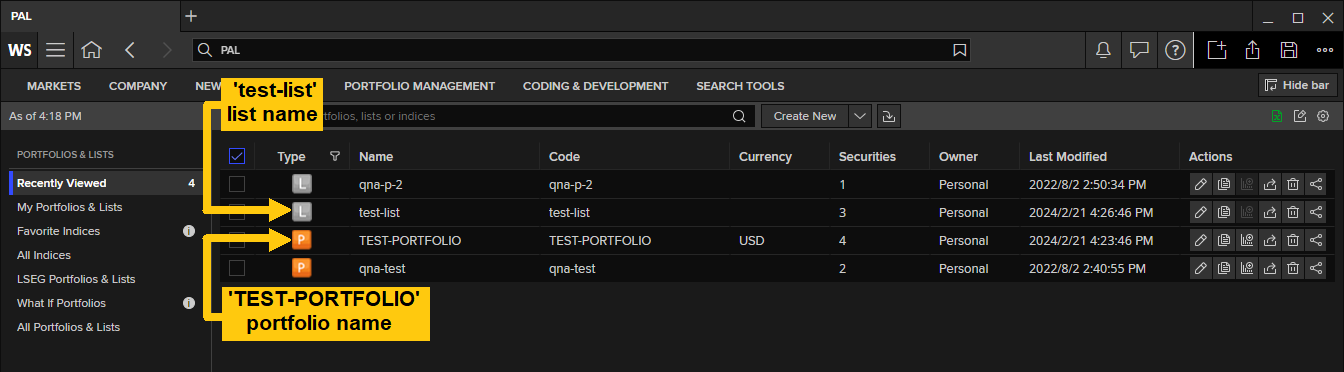

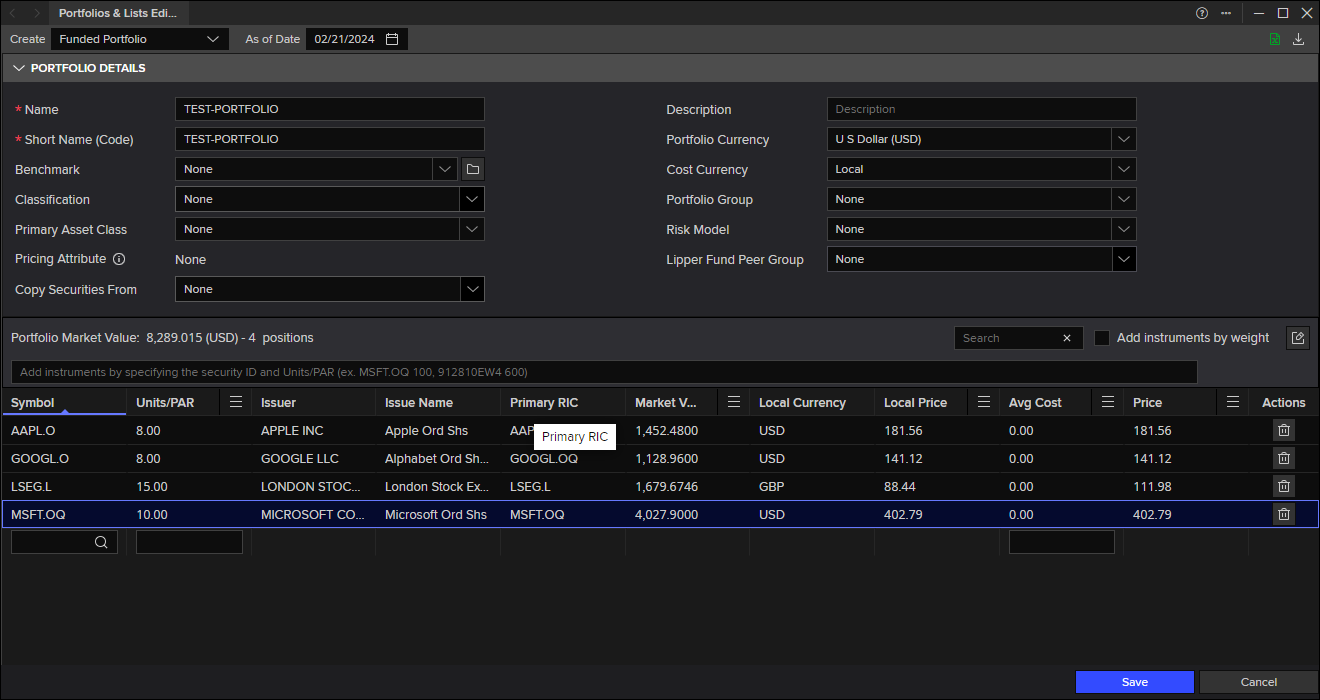

In [32]:
# Example 1 - Portfolio
fields = ['TR.PortfolioStatementDate','TR.PortfolioModifiedDate','TR.PortfolioConstituentName',
          'TR.PortfolioShares','TR.PortfolioWeight','TR.PortfolioDate',
          'TR.PriceClose','TR.CompanyMarketCap']

port_data = rd.get_data(["Portfolio('TEST-PORTFOLIO','20240221')"], fields)
port_data

,Instrument,Portfolio Statement Date,Portfolio Modified Date,Issuer Name,Portfolio Shares,Portfolio Weight,Price Close,Company Market Cap
0,MSFT.OQ,2024-02-21,2024-02-21 09:23:46,MICROSOFT CORP,10,0.48561,421.43,3131408739987.470215
1,LSEG.L,2024-02-21,2024-02-21 09:23:46,LONDON STOCK EXCHANGE GROUP PLC,15,0.20058,9592.0,51321739297.5392
2,AAPL.O,2024-02-21,2024-02-21 09:23:46,APPLE INC,8,0.176113,173.31,2676232396110.0
3,GOOGL.O,2024-02-21,2024-02-21 09:23:46,GOOGLE LLC,8,0.137697,150.87,1881834680000.0


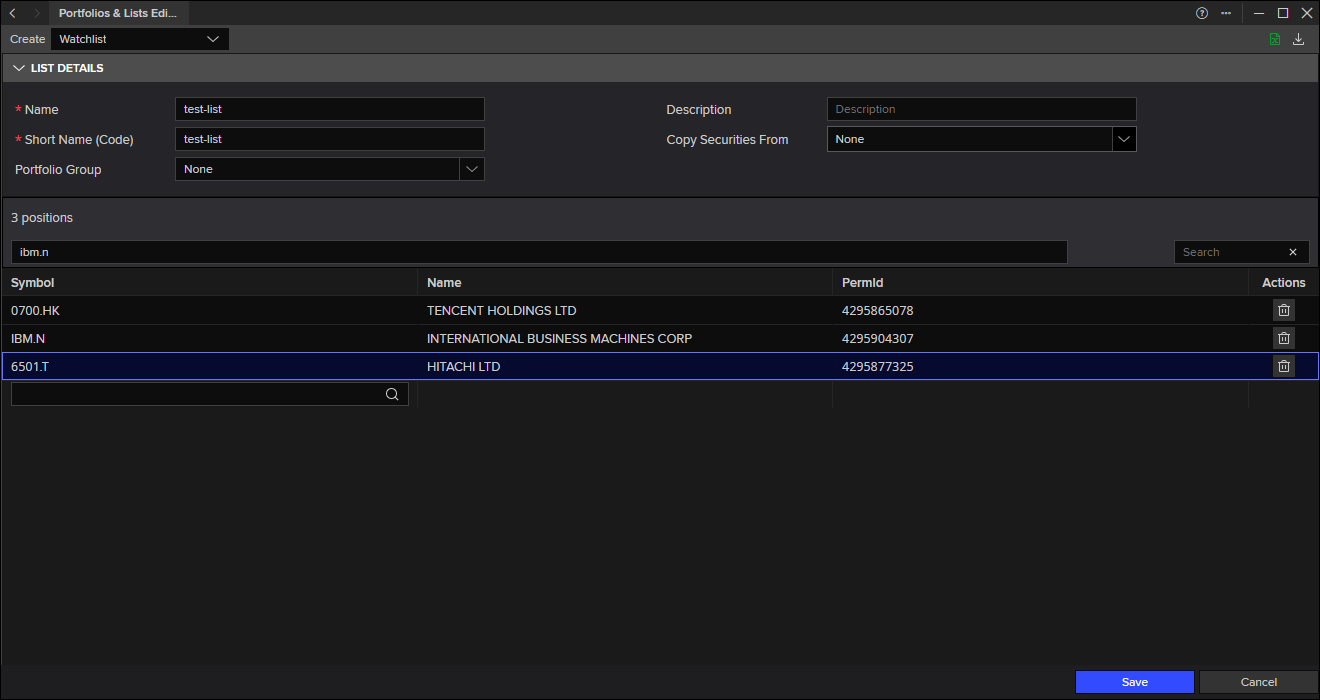

In [33]:
# Example 2 - List
list_data = rd.get_data("List('test-list')",['TR.RIC','CF_LAST'])
list_data

,Instrument,RIC,CF_LAST
0,0700.HK,0700.HK,303.8
1,IBM.N,IBM.N,190.8
2,6501.T,6501.T,13755.0


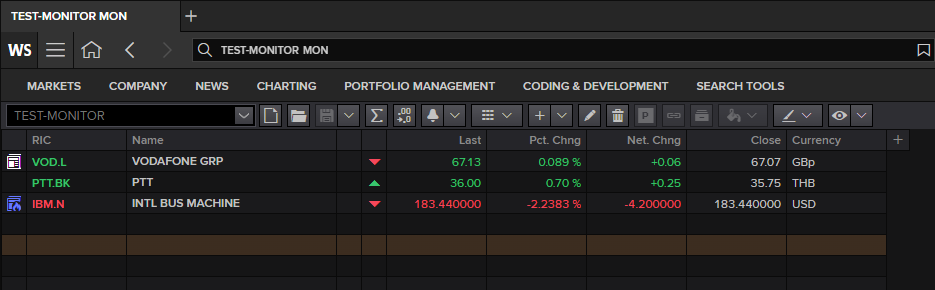

In [34]:
# Example 3 - Monitor
monitor_data = rd.get_data("Monitor('TEST-MONITOR')",['TR.RIC','CF_LAST'])
monitor_data

,Instrument,RIC,CF_LAST
0,VOD.L,VOD.L,70.27
1,PTT.BK,PTT.BK,33.75
2,IBM.N,IBM.N,190.8


In [35]:
# Example 4 - Index/Exchange Constituents as of certain date
index_data = rd.get_data('0#.IXIC(20230102)',['TR.RIC'])
index_data

,Instrument,RIC
0,TXG.OQ,TXG.OQ
1,YI.OQ,YI.OQ
2,YQ.OQ,YQ.OQ
3,ATNF.OQ,ATNF.OQ
4,FLWS.OQ,FLWS.OQ
...,...,...
3663,CNET.OQ,CNET.OQ
3664,ZYME.OQ,ZYME.OQ
3665,ZYNE.OQ^J23,ZYNE.OQ^J23
3666,ZYXI.OQ,ZYXI.OQ


In [36]:
# Example 5 - Index Leavers/Joiners
fields = ['TR.IndexJLConstituentRIC','TR.IndexJLConstituentName','TR.IndexJLConstituentChangeDate.change']

leavers_joiners = rd.get_data('.SPX', fields,{'SDate':'20190101','EDate':'20191201','IC':'B'})
leavers_joiners

,Instrument,Constituent RIC,Constituent Name,Change
0,.SPX,FRC.N^E23,Frst Rep Bk,Joiner
1,.SPX,SCG.N^A19,SCANA,Leaver
2,.SPX,TFX.N,Teleflex,Joiner
3,.SPX,PCG.N,PG&E Us,Leaver
4,.SPX,CVET.OQ^J22,Covetrus,Joiner
...,...,...,...,...
33,.SPX,JEF.N,Jefferies Fincl,Leaver
34,.SPX,LVS.N,LVSC,Joiner
35,.SPX,NKTR.OQ,Nektar,Leaver
36,.SPX,NOW.N,ServiceNow,Joiner


## 12) Fixed Income Data

In [37]:
# Example 1 - Bond Status
rics = ['841338AA4=','717081EP4=','US10YT=RR','FR201534887=','931142BF9=','909279AG6=']
fields = ['TR.FiIssuerName','TR.FiNetCoupon','TR.FiMaturityDate','TR.FIAssetStatus','TR.FiAssetStatusDescription']

bond_status = rd.get_data(rics, fields)
bond_status

,Instrument,Issuer Name,Net Coupon,Maturity Date,Asset Status,Asset Status Description
0,841338AA4=,SOUTHEAST BANKING CORP,4.75,1997-10-15,DEF,In Default
1,717081EP4=,PFIZER INC,3.6,2028-09-15,ISS,Issued
2,US10YT=RR,UNITED STATES TREASURY,4.0,2034-02-15,RPN,Re-Opening
3,FR201534887=,AIR LIQUIDE FINANCE SA,0.625,2030-06-20,ISS,Issued
4,931142BF9=,WALMART INC,7.55,2030-02-15,RPN,Re-Opening
5,909279AG6=,UNITED AIRLINES INC,10.85,2014-07-05,DEF,In Default


In [38]:
# Example 2 - Fixed Income Securities Core Reference Data
rics = ['717081EP4=','US10YT=RR','FR201534887=','931142BF9=','DE182350257=']
fields = ['TR.FiIssuerName','TR.FiParentTicker','TR.ISIN','TR.CUSIP','TR.FiCurrency',
          'TR.FiNetCoupon','TR.FiMaturityDate','TR.FiIndustrySubSectorDescription',
          'TR.FiSPRating','TR.FiMoodysRating','TR.FiFitchsRating','TR.FiFaceOutstanding']

fi_sec_master = rd.get_data(rics, fields)
fi_sec_master

,Instrument,Issuer Name,Parent Ticker,ISIN,CUSIP,Currency,Net Coupon,Maturity Date,Industry Sub Sector Description,SP Rating,Moodys Rating,Fitchs Rating,Face Outstanding
0,717081EP4=,PFIZER INC,PFE,US717081EP40,717081EP4,USD,3.6,2028-09-15,Pharmaceuticals,<NA>,A2,A,1000000000
1,US10YT=RR,UNITED STATES TREASURY,UST,US91282CJZ59,91282CJZ5,USD,4.0,2034-02-15,Sovereign,<NA>,Aaa,AA+,84103931400
2,FR201534887=,AIR LIQUIDE FINANCE SA,AIRP,FR0013428067,,EUR,0.625,2030-06-20,Financial - Other,<NA>,A2,,600000000
3,931142BF9=,WALMART INC,WMT,US931142BF98,931142BF9,USD,7.55,2030-02-15,Retail Stores - Other,<NA>,Aa2,AA,469208000
4,DE182350257=,BASF SE,BASF,XS1823502577,,EUR,1.5,2030-05-22,Chemicals,<NA>,A3,A,500000000


In [39]:
# Example 3 - Bond Pricing
bond_rics=['US931142CB75=TE','931142CB7=RRPS','931142CB7=','931142CB7=2M','931142CB7=1M']
fields = ['CF_SOURCE','TR.BIDPRICE','TR.ASKPRICE','TR.MIDPRICE','TR.BIDYIELD','TR.MIDYIELD','TR.ASKYIELD']

bond_prices = rd.get_data(bond_rics, fields)
bond_prices.sort_values(['Mid Price'])

,Instrument,Bid Price,Ask Price,Mid Price,Bid Yield,Mid Yield,Ask Yield,CF_SOURCE
2,931142CB7=,104.8344,105.1054,104.9699,4.6976,4.6826,4.6676,Eval Pricing
1,931142CB7=RRPS,104.835,105.106,104.9705,4.697511,4.682497,4.667511,Eval Pricing
0,US931142CB75=TE,104.785,105.161,105.113,4.703,4.667,4.661,TWB
3,931142CB7=2M,104.902,105.2684,<NA>,4.69,<NA>,4.6498,MDM
4,931142CB7=1M,104.902,105.2684,<NA>,4.69,<NA>,4.6498,MARKETAXESS


In [40]:
# Example 4 - Bond Analytics
RICS = ['717081EP4=','US10YT=RR','FR201534887=','931142BF9=','DE182350257=']
fields = ['TR.YieldToMaturityAnalytics','TR.YieldToWorstAnalytics','TR.DurationAnalytics',
          'TR.ModifiedDurationAnalytics','TR.ConvexityAnalytics','TR.GovernmentSpreadAnalytics',
          'TR.SwapSpreadAnalytics','TR.AssetSwapSpreadAnalytics','TR.ZSpreadAnalytics','TR.OASAnalytics']

fi_analytics = rd.get_data(RICS, fields)
fi_analytics

,Instrument,Yield to Maturity,Yield to Worst,Duration,Modified Duration,Convexity,Government Spread,Swap Spread,Asset Swap Spread,Z-Spread,Option Adjusted Spread
0,717081EP4=,4.65745,4.65745,4.1391,4.0449,19.1056,43.354953,29.044953,<NA>,34.118747,33.046965
1,US10YT=RR,4.212134,4.212134,8.1954,8.0263,76.4566,0.0,7.643434,<NA>,7.61737,7.61737
2,FR201534887=,3.084349,3.084349,6.0701,5.8885,40.9595,82.534911,44.534911,42.530761,46.518359,45.516253
3,931142BF9=,4.480681,4.480681,4.8921,4.7849,27.9788,25.678099,25.918099,<NA>,23.422094,23.422094
4,DE182350257=,3.068323,3.068323,5.8116,5.6386,38.5011,80.932256,42.932256,41.468771,44.096582,42.395288


In [41]:
# Example 5 - Historical Bond Pricing
point_in_time = rd.get_data(['717081EP4='],
                                ['TR.YieldToMaturityAnalytics'],
                                {'SDate':'2024-01-17','EDate':'2024-01-17','Frq':'D'})
point_in_time

,Instrument,Yield to Maturity
0,717081EP4=,4.65745


In [42]:
# Example 6 - Historical Analytics
ytm = rd.get_data(['717081EP4='],
                     ['TR.YieldToMaturityAnalytics(ValuationDate=2024-02-10)',
                      'TR.ModifiedDurationAnalytics(ValuationDate=2024-02-10)',
                      'TR.ConvexityAnalytics(ValuationDate=2024-02-10)'])
ytm

,Instrument,Yield to Maturity,Modified Duration,Convexity
0,717081EP4=,4.630817,4.1032,19.8981


In [43]:
# Example 7 - Credit Default Swaps
import time

# Expanding the chain with function (in case the Chain RIC is not supported by the library)
def get_underlying(base_ric):
    LONGNEXTLR = base_ric
    #For LONGLING1 to LONGLINK15 and LONGNEXTLR fields
    fields = ['LONGLINK{}'.format(x) for x in range(1, 15)]
    fields.append('LONGNEXTLR')
 
    all_underlying_rics = []
 
    #if LONGNEXTLR is not empty, try to retrieve the data fields
    while LONGNEXTLR!='':
        df = rd.get_data(LONGNEXTLR,fields)
        LONGNEXTLR = df.iloc[0]['LONGNEXTLR'] if pd.notnull(df.iloc[0]['LONGNEXTLR']) else ''
        
        #If LONGLINK<x> field is not null, append its value to all_underlying_rics list
        for x in range(1, 15):
            currentField = 'LONGLINK{}'.format(x)
            all_underlying_rics.append(df.iloc[0][currentField]) if pd.notnull(df.iloc[0][currentField]) else None
        #delay between each API call for 1 second
        time.sleep(1)
    return all_underlying_rics
 
cdx = get_underlying('0#CDXIG5YC=R')
print(cdx)

['CDXIG5Y=R', 'MSPRDHEADER=', 'AEP5YUSAX=R', 'AESC5YUSAX=R', 'AIG5YUSAX=R', 'ALL5YUSAX=R', 'GMAC5YUSAX=R', 'MO5YUSAX=R', 'AMD5YUSAX=R', 'AXP5YUSAX=R', 'AMGN5YUSAX=R', 'APA5YUSAX=R', 'ARW5YUSAX=R', 'FSFF5YUSAX=R', 'T5YUSAX=R', 'AZO5YUSAX=R', 'AVT5YUSAX=R', 'ABX5YUSAX=R', 'BAX5YUSAX=R', 'BRK5YUSAX=R', 'BBY5YUSAX=R', 'BLCK5YUSAX=R', 'BA5YUSAX=R', 'BWA5YUSAX=R', 'BSX5YUSAX=R', 'BMY5YUSAX=R', 'CPB5YUSAX=R', 'COF5YUSAX=R', 'CAH5YUSAX=R', 'CAT5YUSAX=R', 'CNQ5YUSAX=R', 'CSCF5YUSAX=R', 'CMCS5YUSAX=R', 'CAG5YUSAX=R', 'COX5YUSAX=R', 'CSX5YUSAX=R', 'CVS5YUSAX=R', 'DHR5YUSAX=R', 'DRI5YUSAX=R', 'DE5YUSAX=R', 'DELL5YUSAX=R', 'DVN5YUSAX=R', 'D5YUSAX=R', 'DOW5YUSAX=R', 'DHI5YUSAX=R', 'DXC5YUSAX=R', 'EMN5YUSAX=R', 'ENB5YUSAX=R', 'ETE5YUSAX=R', 'EXC5YUSAX=R', 'EXPE5YUSAX=R', 'FDX5YUSAX=R', 'FE5YUSAX=R', 'F5YUSAX=R', 'FCX5YUSAX=R', 'GE5YUSAX=R', 'GIS5YUSAX=R', 'GMA5YUSAX=R', 'HAL5YUSAX=R', 'HCA5YUSAX=R', 'HES5YUSAX=R', 'HD5YUSAX=R', 'HON5YUSAX=R', 'HSTL5YUSAX=R', 'HPQ5YUSAX=R', 'IBM5YUSAX=R', 'IP5YUSAX=R'

In [44]:
fields = ['TR.CDSOrgShortName','TR.CDSTenor','TR.PARMIDSPREAD','TR.SPREADOVERRATING',
          'TR.SPREADOVERSECTOR','TR.SPREADOVERSUBSECTOR','TR.DEFAULTPROBABILITY']

cds = rd.get_data(cdx, fields)
cds.dropna()

,Instrument,Ref Entity,Tenor,Par Mid Spread,Spread Over Rating,Spread Over Sector,Spread Over Sub Sector,Default Probability
13,FSFF5YUSAX=R,Assurd Grnty Mun,5Y,50.59,17.24,11.11,-5.06,4.507
27,COF5YUSAX=R,Capital One Fin,5Y,65.31,-6.32,-20.33,-18.33,5.808
88,FPLG5YUSAX=R,NextEra Hldg,5Y,66.78,17.72,11.36,14.62,5.922


## 13) Pricing streams
[EX-1.01.03-PricingStream.ipynb](https://github.com/LSEG-API-Samples/Example.DataLibrary.Python/blob/main/Examples/1-Access/EX-1.01.03-PricingStream.ipynb)

In [45]:
# Example 1 - Using pricing streams with events

import datetime
from IPython.display import display, clear_output

# Define a callback to receive data events
def display_data(data, instrument, stream):
    clear_output(wait=True)
    current_time = datetime.datetime.now().time()
    print(current_time, "- Data received for", instrument)
    display(data)

# Open the stream and register the callback
stream = rd.open_pricing_stream(
    universe=['GBP=', 'EUR=', 'JPY='],
    fields=['BID', 'ASK'],
    on_data=display_data
)

16:11:57.880332 - Data received for JPY=


,ASK,BID
JPY=,151.47,151.44


In [46]:
# Close the stream
stream.close()

<OpenState.Closed: 'Closed'>

In [47]:
# Example 2 - Using pricing streams as a data cache
# Create and open a Pricing stream object
stream = rd.open_pricing_stream(
    universe=['GBP=', 'EUR=', 'JPY='],
    fields=['BID', 'ASK']
)
# Extract snapshot data from the streaming cache
stream.get_snapshot()

,Instrument,ASK,BID
0,GBP=,1.2599,1.2595
1,EUR=,1.0786,1.0782
2,JPY=,151.47,151.44


In [48]:
# Example 3 - Get a snapshot for a subset of instruments and fields
stream.get_snapshot(
    universe = ['EUR=', 'GBP='], 
    fields = ['BID', 'ASK']
)

,Instrument,BID,ASK
0,EUR=,1.0782,1.0786
1,GBP=,1.2595,1.2599
